In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
# import tqdm

In [4]:
File_name = '12859_2019_2897_MOESM2_ESM.xlsx'

sheet_names = pd.ExcelFile(File_name).sheet_names
sheets = {}
for sheet in sheet_names:
    sheets[sheet] = pd.read_excel(File_name,sheet_name=sheet,index_col=0)
#load the graphs into a dictionary
graphs = {}
for sheet in sheet_names:
    graphs[sheet] = nx.from_pandas_adjacency(sheets[sheet],create_using=nx.DiGraph)

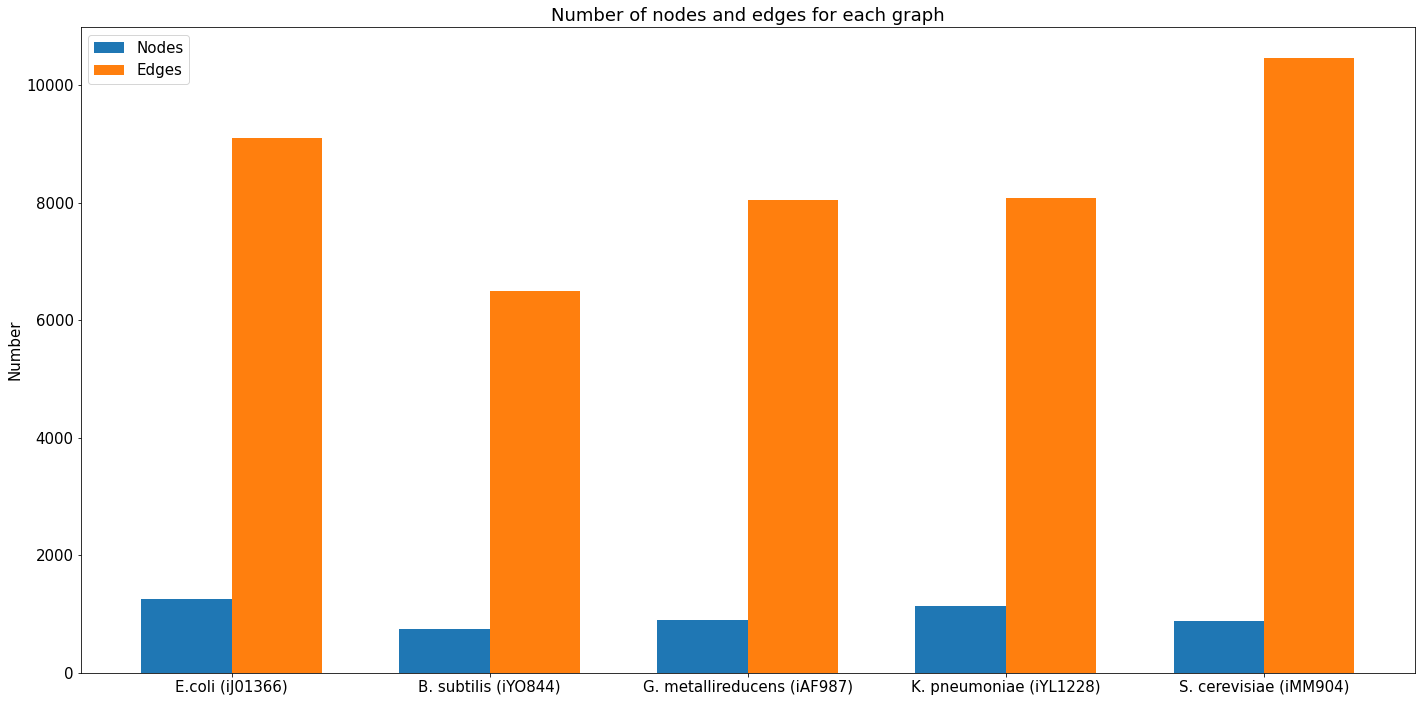

In [174]:
#plot the number of nodes and edges as a bar chart for each graph
edges = []
nodes = []
for sheet in sheet_names:
    edges.append(len(graphs[sheet].edges))
    nodes.append(len(graphs[sheet].nodes))
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(sheet_names))
width = 0.35
rects1 = ax.bar(x - width/2, nodes, width, label='Nodes')
rects2 = ax.bar(x + width/2, edges, width, label='Edges')
ax.set_ylabel('Number')
ax.set_title('Number of nodes and edges for each graph')
ax.set_xticks(x)
ax.set_xticklabels(sheet_names)
ax.legend()
plt.rcParams.update({'font.size': 15})

plt.show()


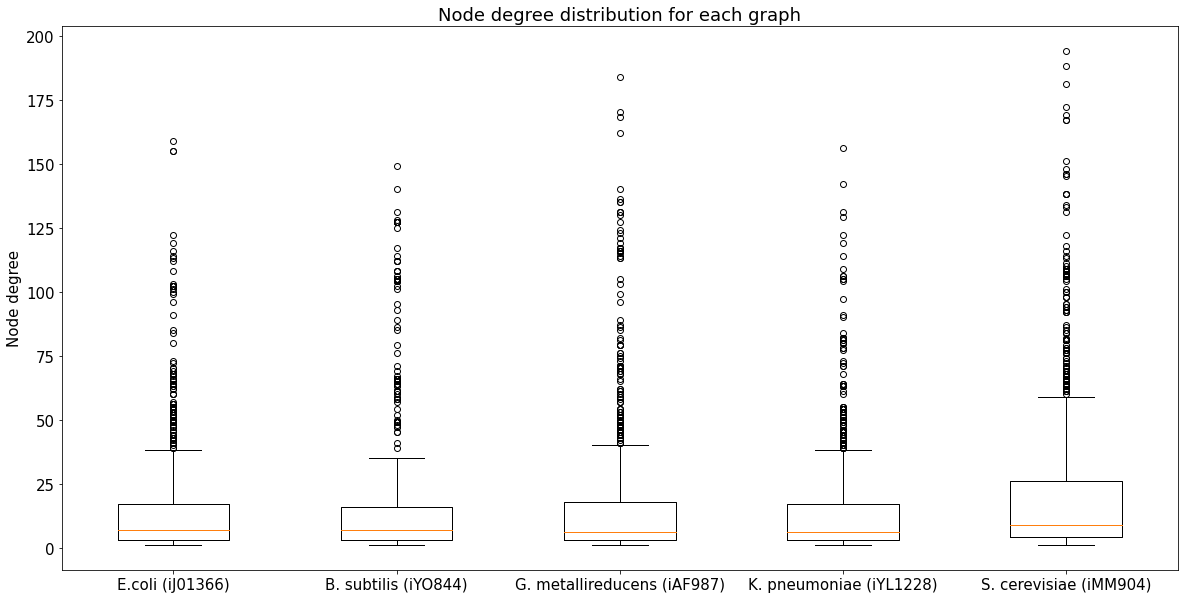

In [4]:
node_degrees = []
for sheet in sheet_names:
    node_degrees.append(list(dict(nx.degree(graphs[sheet])).values()))

fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(node_degrees)
ax.set_xticklabels(sheet_names)
ax.set_ylabel('Node degree')
ax.set_title('Node degree distribution for each graph')
plt.rcParams.update({'font.size': 15})
plt.show()


In [32]:
ecoli_bridging_centrality = nx.betweenness_centrality(graphs["E.coli (iJ01366)"], weight='weight', normalized = False)
ecoli_bridging_centrality_values = list(ecoli_bridging_centrality.values())
log10_unique_centrality_values = [np.log10(value + 1) for value in ecoli_bridging_centrality_values]

In [2]:
# len(log10_unique_centrality_values)
# log10_unique_centrality_values

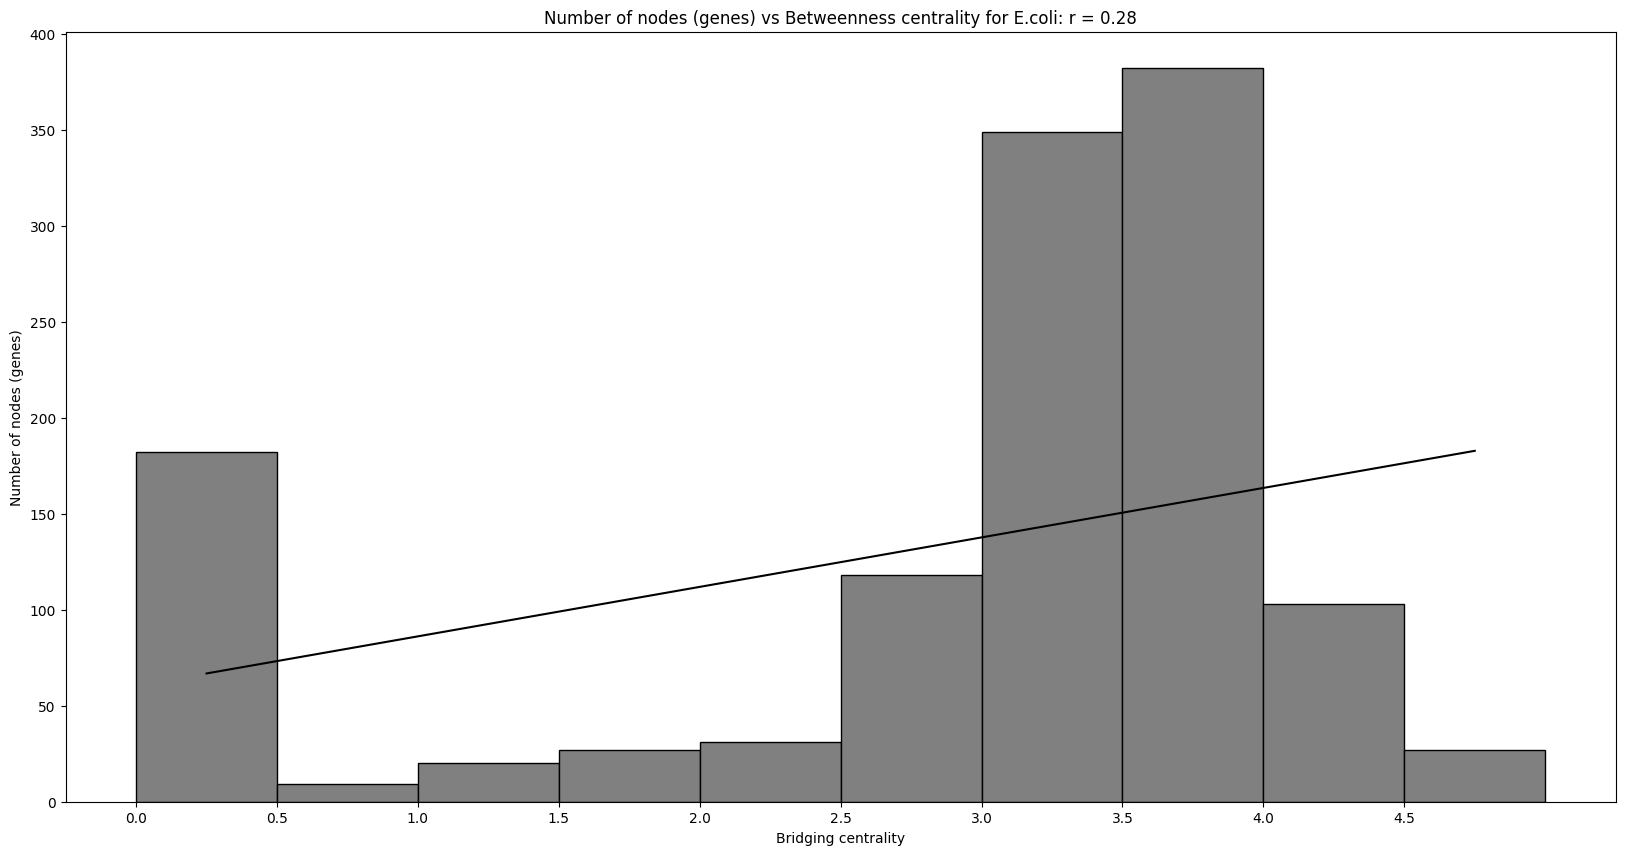

In [33]:
import numpy as np
from scipy.stats import linregress

fig, ax = plt.subplots(figsize=(20,10))

# bins = np.arange(0, 5.5, 0.5)
bins = np.arange(0, 5.5, 0.5)

hist_data, bin_edges = np.histogram(log10_unique_centrality_values, bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# bin_centers=np.arange(0.0, 5, 0.5)

slope, intercept, r_value, p_value, std_err = linregress(bin_centers, hist_data)
x_values = np.linspace(min(bin_centers), max(bin_centers), 100)
y_values = slope * x_values + intercept
ax.hist(log10_unique_centrality_values, bins=bins, color='gray', edgecolor='black')
ax.plot(x_values, y_values, color='black')

ax.set_xlabel('Bridging centrality')
ax.set_ylabel('Number of nodes (genes)')
ax.set_title(f'Number of nodes (genes) vs Betweenness centrality for E.coli: r = {r_value:.2f}')
plt.rcParams.update({'font.size': 15})
plt.gca().set_xticks(np.arange(0, 5, 0.5))
plt.show()


In [34]:
df_f=[i for i in log10_unique_centrality_values if i<=2 and i>1.5]
len(df_f)

27

In [128]:
np.arange(0, 5.0, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [117]:
# pip install cobra
np.arange(0, 5.5, 0.5)
bin_centers
# (bin_edges[:-1] + bin_edges[1:])
np.arange(0.0, 5, 0.5)/2
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [5]:
import cobra
from cobra.io import read_sbml_model
from pathlib import Path
import os

#Fixing typo in supplimentary table from the paper
index = sheet_names.index("E.coli (iJ01366)")
sheet_names[index] = "E.coli (iJO1366)"


Micro_models = {}
for sheet in sheet_names:
    model_name = sheet.split('(')[1].split(')')[0]
    model_path = Path('Data/'+model_name+'.xml')
    if os.path.isfile(model_path):
        Micro_models[sheet] = read_sbml_model(str(model_path))
    else:
        print(f"File {model_path} does not exist.")

In [223]:
Micro_models

{'E.coli (iJO1366)': <Model iJO1366 at 0x203830e6e80>,
 'B. subtilis (iYO844)': <Model iYO844 at 0x203859d48b0>,
 'G. metallireducens (iAF987)': <Model iAF987 at 0x20386585b80>,
 'K. pneumoniae (iYL1228)': <Model iYL1228 at 0x203867a6190>,
 'S. cerevisiae (iMM904)': <Model iMM904 at 0x20385dab6a0>}

In [6]:
# add cob(i)alamin to allowed nutrients list
# what does the prefix EX mean, shouldn't we use prefix M?
allowed_nutrients = ['EX_ca2_e', 'EX_cl_e', 'EX_co2_e', 'EX_cobalt2_e', 'EX_cu2_e', 'EX_fe2_e', 'EX_fe3_e', 'EX_glc__D_e', 'EX_h_e', 'EX_h2o_e', 'EX_h_e', 'EX_k_e', 'EX_mg2_e', 'EX_mn2_e', 'EX_mqn8_e', 'EX_na1_e', 'EX_nh4_e', 'EX_ni2_e', 'EX_o2_e', 'EX_sel_e', 'EX_slnt_e', 'EX_so4_e', 'EX_tungs_e', 'EX_zn2_e']
allowed_nutrients.append('EX_cbl1_e')
# allowed_nutrients=[i.replace("EX", "M") for i in allowed_nutrients]
len(allowed_nutrients)

25

In [8]:
# get model
ecoli_model=Micro_models["E.coli (iJO1366)"].copy()

__Note:__ In the bar graph above, the dots should represent the proportion of essential reactions relative to all reactions, however, doesn't this mean that smaller degree nodes might be more susceptible to outliers. A low number of essential reactions is required to generate a high percentage value.

In [9]:
import cobra
from cobra.io import read_sbml_model
from pathlib import Path
import os

# allowed nutrients are above
# allowed_nutrients = ['EX_ca2_e', 'EX_cl_e', 'EX_co2_e', 'EX_cobalt2_e', 'EX_cu2_e', 'EX_fe2_e', 'EX_fe3_e', 'EX_glc__D_e', 'EX_h_e', 'EX_h2o_e', 'EX_h_e', 'EX_k_e', 'EX_mg2_e', 'EX_mn2_e', 'EX_mqn8_e', 'EX_na1_e', 'EX_nh4_e', 'EX_ni2_e', 'EX_o2_e', 'EX_sel_e', 'EX_slnt_e', 'EX_so4_e', 'EX_tungs_e', 'EX_zn2_e']

# ecoli_model = Micro_models["E.coli (iJO1366)"]

# what does changing lower bound do?
for reaction in ecoli_model.exchanges:
    if reaction.id in allowed_nutrients:
        reaction.lower_bound = -1000
    #change this code so it only overrides when no value is given in the model

solution = ecoli_model.optimize()
fluxes=pd.DataFrame(solution.fluxes)

print('Growth rate: ', solution.objective_value)

Growth rate:  31.282171769776607


In [308]:
fluxes.loc["ALATA_L"]

fluxes   -18.186078
Name: ALATA_L, dtype: float64

In [337]:
rxn_df=ecoli_model.reactions.get_by_id("ASPTA")
old_bounds=rxn_df.bounds
rxn_df.knock_out()
solution=ecoli_model.optimize()
print('Growth rate: ', solution.objective_value)
rxn_df.bounds=old_bounds

Growth rate:  4.856313681866045e-13


In [283]:
# rxn_df=ecoli_model.reactions.get_by_id("ASPTA")

In [250]:
# ecoli_model.reactions.get_by_id("ASPTA")

In [249]:
# ecoli_model.remove_reactions(["ASPTA"])

In [248]:
# ecoli_model.add_reactions("ASPTA")

In [11]:
# create df and adjust index and column names
ecoli_graph_df=sheets["E.coli (iJ01366)"]
ecoli_graph_df.index=ecoli_graph_df.index.str.replace(" ", "")
ecoli_graph_df.columns=ecoli_graph_df.columns.str.replace(" ", "")

# make reaction correction
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("THRA2i", "THRA2")
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("THRAi", "THRA")
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("PPK2r", "PPK2")
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("SULRi", "SULR")

In [12]:
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("SULRi", "SULR")

In [13]:
# leave one feature out (remove one reaction at a time) and compute growth rate
fba_ecoli_lofo={}
reactions=list(ecoli_graph_df.index)
# reactions=reactions[0:10]
for rxn in reactions:
    rxn_df=ecoli_model.reactions.get_by_id(rxn)
    old_bounds=rxn_df.bounds
    rxn_df.knock_out()
    solution=ecoli_model.optimize()
#     print('Growth rate: ', solution.objective_value)
    fba_ecoli_lofo[rxn]=solution.objective_value
    rxn_df.bounds=old_bounds
    
    #change this code so it only overrides when no value is given in the model
#     for reaction in ecoli_model_rmv_rxn.exchanges:
#         if reaction.id in allowed_nutrients:
#             reaction.lower_bound = -1000
            
#     solution = ecoli_model_rmv_rxn.optimize()
#     fba_ecoli_lofo[rxn]=solution.objective_value
#     ecoli_model.add_reactions(rxn)

In [15]:
fba_ecoli_lofo.get("SERAT")

1.688205598652189e-13

In [158]:
# ecoli_model.exchanges
ca2=ecoli_model.reactions.get_by_id("EX_ca2_e")
cobalt2=ecoli_model.reactions.get_by_id("EX_cobalt2_e")
ecoli_model.reactions.get_by_id("2AGPEAT120")
ecoli_model.remove_reactions

Reaction identifier,2AGPEAT120
Name,2-acyl-glycerophospho-ethanolamine acyltransferase (n-C12:0)
Memory address,0x203ee2efa30
Stoichiometry,"2agpe120_c + atp_c + ddca_c --> amp_c + pe120_c + ppi_c 2-Acyl-sn-glycero-3-phosphoethanolamine (n-C12:0) + ATP C10H12N5O13P3 + Dodecanoate (n-C12:0) --> AMP C10H12N5O7P + Phosphatidylethanolamine (didodecanoyl, n-C12:0) + Diphosphate"
GPR,b2836
Lower bound,0.0
Upper bound,1000.0


In [78]:
ca2
cobalt2

Reaction identifier,EX_cobalt2_e
Name,Co2+ exchange
Memory address,0x203ee17c760
Stoichiometry,cobalt2_e <=> Co2+ <=>
GPR,
Lower bound,-1000
Upper bound,1000.0


In [80]:
ecoli_model.exchanges
ecoli_model.genes.b0036

Gene identifier,b0036
Name,caiD
Memory address,0x203edecbdf0
Functional,True
In 2 reaction(s),"CRNCAR, CRNCDH"


In [50]:
solution

,fluxes,reduced_costs
EX_cm_e,0.000000,0.000000e+00
EX_cmp_e,0.000000,-2.812832e-01
EX_co2_e,476.424831,0.000000e+00
EX_cobalt2_e,-0.000782,0.000000e+00
DM_4crsol_c,0.006976,0.000000e+00
...,...,...
RNDR4,0.818529,-1.214306e-17
RNDR4b,0.000000,1.026631e-16
RNTR1c2,0.000000,-4.173080e-15
RNTR2c2,0.845150,5.551115e-17


In [17]:
fluxes=pd.DataFrame(solution.fluxes)

## Essential reactions

In [20]:
threshold = (solution.objective_value)/20
threshold

1.5641085884888506

In [29]:
Essential_reactions=[]
for reaction in fba_ecoli_lofo:
    if fba_ecoli_lofo[reaction]<threshold:
        Essential_reactions.append(reaction)
len(Essential_reactions)

242

## recreating figure 3 B

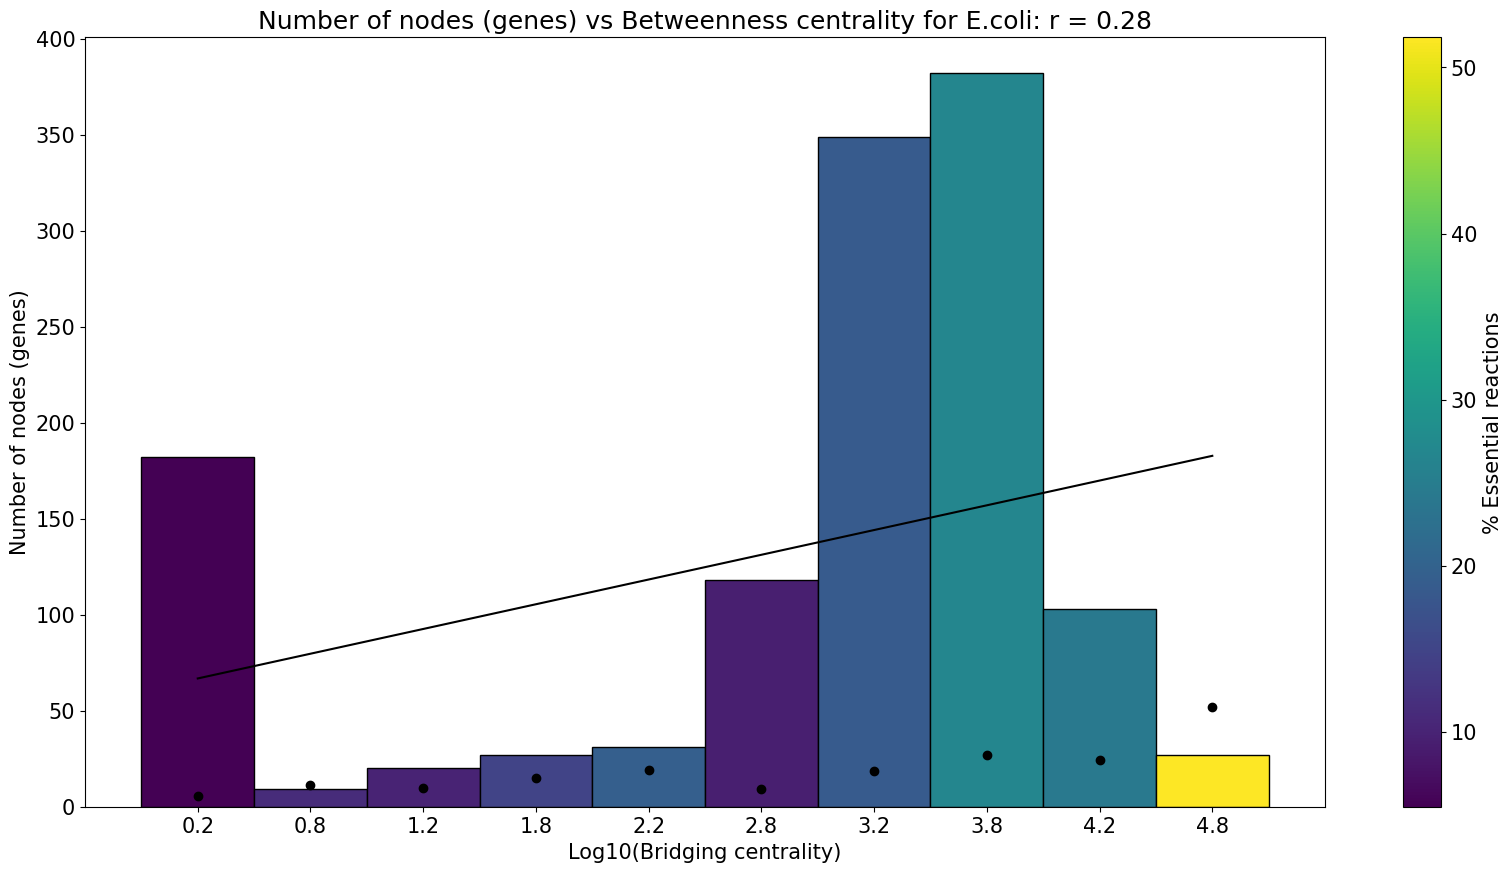

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import networkx as nx


ecoli_bridging_centrality = nx.betweenness_centrality(graphs["E.coli (iJ01366)"], weight='weight', normalized=False)
ecoli_bridging_centrality_values = list(ecoli_bridging_centrality.values())

ecoli_bridging_centrality = {key.strip(): value for key, value in ecoli_bridging_centrality.items()}


log10_unique_centrality_values = [np.log10(value + 1) for value in ecoli_bridging_centrality_values]

bins = np.arange(0, 5.5, 0.5)

hist_data, bin_edges = np.histogram(log10_unique_centrality_values, bins=bins)

essential_reactions_percentage = []
for bin_start, bin_end in zip(bin_edges[:-1], bin_edges[1:]):
    in_bin = [reaction for reaction, centrality in ecoli_bridging_centrality.items() if bin_start <= np.log10(centrality + 1) < bin_end]
    essential_in_bin = sum(reaction in Essential_reactions for reaction in in_bin)
    if in_bin:  
        essential_reactions_percentage.append((essential_in_bin / len(in_bin)) * 100)
    else:
        essential_reactions_percentage.append(0)

cmap = plt.cm.viridis
norm = plt.Normalize(min(essential_reactions_percentage), max(essential_reactions_percentage))
colors = cmap(norm(essential_reactions_percentage))

fig, ax = plt.subplots(figsize=(20,10))
bar_container = ax.bar(bin_edges[:-1], hist_data, width=np.diff(bin_edges), color=colors, edgecolor='black', align='edge')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
slope, intercept, r_value, p_value, std_err = linregress(bin_centers, hist_data)
x_values = np.linspace(min(bin_centers), max(bin_centers), 100)
y_values = slope * x_values + intercept
ax.plot(x_values, y_values, color='black')

ax.scatter(bin_centers, essential_reactions_percentage, color='black', zorder=5)


ax.set_xlabel('Log10(Bridging centrality)')
ax.set_ylabel('Number of nodes (genes)')
ax.set_title(f'Number of nodes (genes) vs Betweenness centrality for E.coli: r = {r_value:.2f}')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.ax.set_ylabel('% Essential reactions')

plt.xticks(bin_centers, labels=[f"{center:.1f}" for center in bin_centers])

plt.rcParams.update({'font.size': 15})
plt.show()


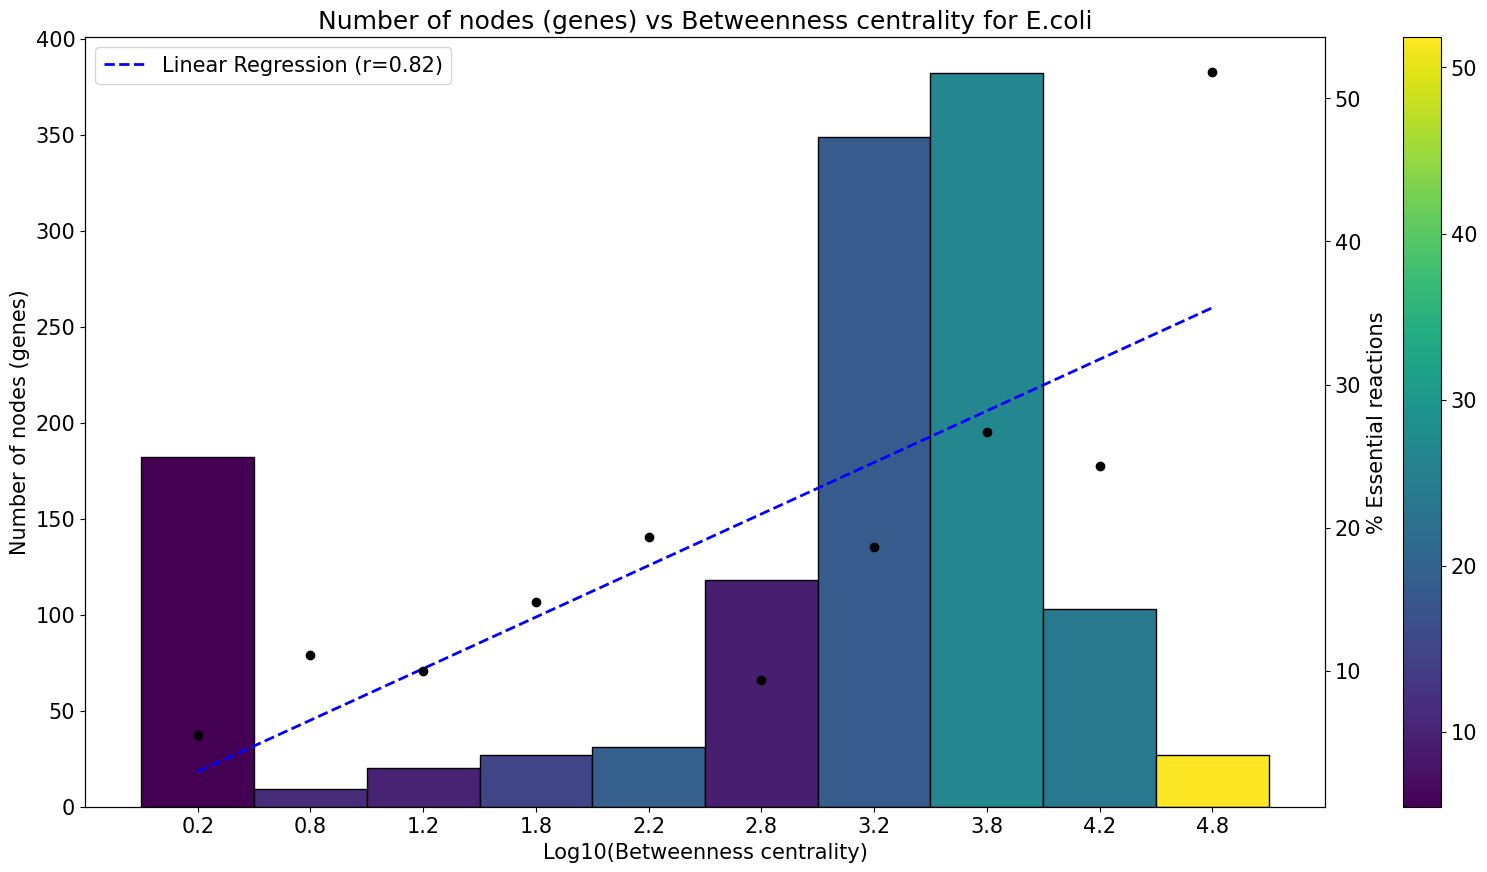

In [55]:
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot the histogram on the primary y-axis (ax1)
ax1.bar(bin_edges[:-1], hist_data, width=np.diff(bin_edges), color=colors, edgecolor='black', align='edge')

# Create a secondary y-axis (ax2) for the essential reactions percentage
ax2 = ax1.twinx()

# Plot the scatter points for essential reactions percentage on the secondary y-axis (ax2)
ax2.scatter(bin_centers, essential_reactions_percentage, color='black', zorder=5)

# Perform linear regression on the essential reactions percentage
slope, intercept, r_value, p_value, std_err = linregress(bin_centers, essential_reactions_percentage)
x_reg_values = np.linspace(min(bin_centers), max(bin_centers), 100)
y_reg_values = slope * x_reg_values + intercept

# Plot the regression line on the secondary y-axis (ax2)
ax2.plot(x_reg_values, y_reg_values, color='blue', linestyle='--', linewidth=2, label=f'Linear Regression (r={r_value:.2f})')

# Set the labels for both y-axes
ax1.set_ylabel('Number of nodes (genes)', color='black')
ax2.set_ylabel('% Essential reactions', color='black')

# Set the title and x-label
ax1.set_xlabel('Log10(Betweenness centrality)')
ax1.set_title('Number of nodes (genes) vs Betweenness centrality for E.coli')

# Add a legend to the secondary y-axis
ax2.legend(loc='upper left')

# Set the color of the axis and labels to match the data
ax1.tick_params(axis='y', colors='black')
# ax2.tick_params(axis='y', colors='black')

# Add colorbar for the percentage of essential reactions using the primary y-axis color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1, orientation='vertical')
# cbar.ax.set_ylabel('% Essential reactions')

# Set x-ticks
ax1.set_xticks(bin_centers)
ax1.set_xticklabels([f"{center:.1f}" for center in bin_centers])

# Update plot aesthetics
plt.rcParams.update({'font.size': 15})

plt.show()

## figure 3 C


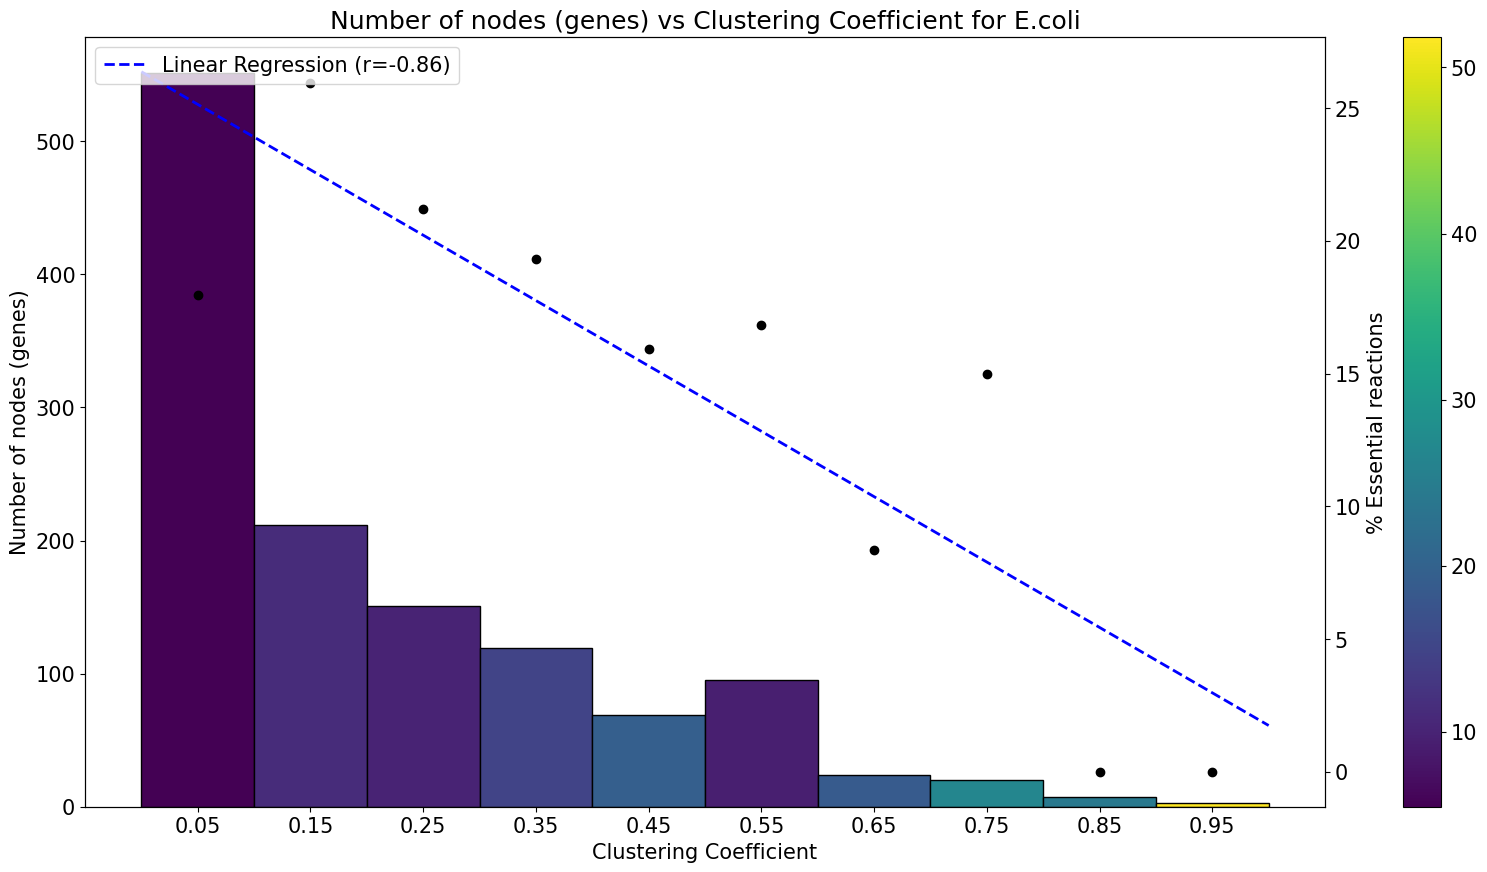

In [58]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the clustering coefficient for each node
ecoli_clustering_coefficient = nx.clustering(graphs["E.coli (iJ01366)"])
clustering_coefficient_values = list(ecoli_clustering_coefficient.values())
ecoli_clustering_coefficient = {key.strip(): value for key, value in ecoli_clustering_coefficient.items()}

# Define bins for the clustering coefficient
bins = np.linspace(0, 1, num=11)  # Adjust the number of bins as needed
hist_data, bin_edges = np.histogram(clustering_coefficient_values, bins=bins)

# Calculate essential reactions percentages for each bin (similar to before)
essential_reactions_percentage = []
for bin_start, bin_end in zip(bin_edges[:-1], bin_edges[1:]):
    # Find reactions within the current bin
    reactions_in_bin = [reaction for reaction, coeff in ecoli_clustering_coefficient.items() 
                        if bin_start <= coeff < bin_end]
    
    # Count how many of these are essential
    essential_count = sum(reaction in Essential_reactions for reaction in reactions_in_bin)
    
    # Calculate percentage
    total_count = len(reactions_in_bin)
    percentage = (essential_count / total_count * 100) if total_count > 0 else 0
    essential_reactions_percentage.append(percentage)

# Plotting (similar to before)
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot the histogram on the primary y-axis (ax1)
ax1.bar(bin_edges[:-1], hist_data, width=np.diff(bin_edges), color=colors, edgecolor='black', align='edge')

# Create a secondary y-axis (ax2) for the essential reactions percentage
ax2 = ax1.twinx()

# Plot the scatter points for essential reactions percentage on the secondary y-axis (ax2)
ax2.scatter((bin_edges[:-1] + bin_edges[1:]) / 2, essential_reactions_percentage, color='black', zorder=5)

# Perform linear regression on the essential reactions percentage
slope, intercept, r_value, p_value, std_err = linregress((bin_edges[:-1] + bin_edges[1:]) / 2, essential_reactions_percentage)
x_reg_values = np.linspace(min(bin_edges), max(bin_edges), 100)
y_reg_values = slope * x_reg_values + intercept

# Plot the regression line on the secondary y-axis (ax2)
ax2.plot(x_reg_values, y_reg_values, color='blue', linestyle='--', linewidth=2, label=f'Linear Regression (r={r_value:.2f})')

# Set labels, title, and legend
ax1.set_xlabel('Clustering Coefficient')
ax1.set_ylabel('Number of nodes (genes)', color='black')
ax2.set_ylabel('% Essential reactions', color='black')
ax1.set_title('Number of nodes (genes) vs Clustering Coefficient for E.coli')
ax2.legend(loc='upper left')

# Set x-ticks
ax1.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)
ax1.set_xticklabels([f"{center:.2f}" for center in (bin_edges[:-1] + bin_edges[1:]) / 2])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1, orientation='vertical')
# Update plot aesthetics
plt.rcParams.update({'font.size': 15})
plt.show()


In [44]:
ecoli_bridging_centrality

{' 2AGPEAT120 ': 0.0,
 ' APH120 ': 12.260714285714286,
 ' FA120ACPHi ': 1988.5955907421521,
 ' FACOAE120 ': 5216.675451223739,
 ' LPLIPAL2A120 ': 0.0,
 ' LPLIPAL2E120 ': 0.0,
 ' LPLIPAL2G120 ': 0.0,
 ' 2AGPGAT120 ': 2744.020775710981,
 ' AACPS7 ': 11297.430915457477,
 ' ACPPAT120 ': 2565.710834032308,
 ' AACPS1 ': 17833.29412364406,
 ' AACPS2 ': 13159.308759125848,
 ' AACPS3 ': 10770.090452394506,
 ' AACPS4 ': 14550.317903547662,
 ' AACPS5 ': 10356.96175475461,
 ' AACPS6 ': 9128.36842619187,
 ' AACPS8 ': 1882.0020730750646,
 ' AACPS9 ': 8513.033618872956,
 ' ACOATA ': 85920.38420363577,
 ' EAR120x ': 1098.5,
 ' EAR120y ': 1098.5,
 ' MCOATA ': 138554.6153656238,
 ' UAGAAT ': 37147.22103029371,
 ' 3OXCOAT ': 4612.835247876176,
 ' ACACT1r ': 3541.555252021008,
 ' ACACT2r ': 10408.188252223374,
 ' ACACT3r ': 10273.321268329164,
 ' ACACT4r ': 11482.502361216239,
 ' ACACT5r ': 10599.172072677684,
 ' ACACT6r ': 13687.165963461697,
 ' ACACT7r ': 15556.471382421745,
 ' ACACT8r ': 16290.57096606

In [42]:
ecoli_bridging_centrality = nx.betweenness_centrality(graphs["E.coli (iJ01366)"], weight='weight', normalized=False)

# Convert bridging centrality to log10 values
log10_centrality_values = {reaction: np.log10(centrality + 1) for reaction, centrality in ecoli_bridging_centrality.items()}

# Define bins
bins = np.arange(0, 5.5, 0.5)
hist_data, bin_edges = np.histogram(list(log10_centrality_values.values()), bins=bins)

# Initialize essential reactions count per bin
essential_reactions_count_per_bin = np.zeros_like(bin_edges[:-1], dtype=float)

# Loop over each reaction to determine its bin and if it is essential
for reaction, log_centrality in log10_centrality_values.items():
    # Find the bin index for this reaction's centrality
    bin_index = np.digitize(log_centrality, bin_edges) - 1
    # Check if this reaction is essential
    if reaction in Essential_reactions:
        essential_reactions_count_per_bin[bin_index] += 1

# Calculate the percentage of essential reactions for each bin
essential_reactions_percentage = (essential_reactions_count_per_bin / hist_data) * 100
# Replace NaNs or infs with 0 (can happen if hist_data is 0)
essential_reactions_percentage = np.nan_to_num(essential_reactions_percentage)

# Diagnostic print statements (you can remove these once you confirm the calculations are correct)
print("Histogram data (count of reactions per bin):", hist_data)
print("Count of essential reactions per bin:", essential_reactions_count_per_bin)
print("Essential reactions percentage per bin:", essential_reactions_percentage)


Histogram data (count of reactions per bin): [182   9  20  27  31 118 349 382 103  27]
Count of essential reactions per bin: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Essential reactions percentage per bin: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
# Strip whitespace from the keys of ecoli_bridging_centrality dictionary
ecoli_bridging_centrality_cleaned = {key.strip(): value for key, value in ecoli_bridging_centrality.items()}

# Now, check for essential reactions again
total_essential_reactions_cleaned = sum(reaction in Essential_reactions for reaction in ecoli_bridging_centrality_cleaned.keys())

# Print out the cleaned total number of reactions and the number of essential reactions
print(f"Total number of reactions in the cleaned dataset: {len(ecoli_bridging_centrality_cleaned)}")
print(f"Number of essential reactions in the cleaned dataset: {total_essential_reactions_cleaned}")

# Check which essential reactions are present in the cleaned dataset
essential_in_dataset_cleaned = set(Essential_reactions).intersection(ecoli_bridging_centrality_cleaned.keys())
print(f"Essential reactions present in the cleaned dataset: {essential_in_dataset_cleaned}")


Total number of reactions in the cleaned dataset: 1251
Number of essential reactions in the cleaned dataset: 241
Essential reactions present in the cleaned dataset: {'RBFSb', 'IPPS', 'THRD_L', 'ORPT', 'DAPDC', 'ADSL2r', 'GLNS', 'OHPBAT', 'FMNAT', 'ACHBS', 'ILETA', 'HSDy', 'ANPRT', 'ADSL1r', 'DNTPPA', 'CHORM', 'CPMPS', 'TMPK', 'SERAT', 'ANS', 'CS', 'OPMEACPS', 'ASPTA', 'MTHFR2', 'CHORS', 'DAPE', 'ATPPRT', 'GLUPRT', 'DHDPRy', 'QULNS', 'PRASCSi', 'DHFR', 'MTHTHFSs', 'NDPK4', 'LPADSS', 'IPPMIa', 'DTMPK', 'IPMD', 'HPPK2', 'TYRL', 'PRAIS', 'MOADSUx', 'DHPPDA2', 'SHK3Dr', 'APRAUR', 'TYRTA', 'GF6PTA', 'LEUTAi', 'ACGS', 'PSSA161', 'AGPAT161', 'MOAT2', 'G1SAT', 'UAGDP', 'RHCCE', 'ADSS', 'DMATT', 'MPTS', 'DHFS', 'G5SADs', 'TMPPP', 'RBFSa', 'MOHMT', 'GRTT', 'BMOCOS', 'AIRC2', 'METS', 'A5PISO', 'TMDS', 'ARGSL', 'AOXSr2', 'GTPCI', 'PDX5PS', 'DHQS', 'PPNDH', 'OCBT', 'DHORTS', 'CYSTL', 'PGAMT', 'FCLT', 'HSTPT', 'UAMAS', 'DBTS', 'PRMICI', 'MALCOAMT', 'HSST', 'PMPK', 'MPTG', 'PSSA160', 'EGMEACPR', 'PPNC

## Some rando stuff ?

In [157]:
fluxes.loc["2AGPEAT120"]

fluxes    0.0
Name: 2AGPEAT120, dtype: float64

In [1]:
# list(fluxes.index.values)

In [206]:
fluxes.sort_values(by="fluxes")

,fluxes
PGK,-1000.000000
Htex,-1000.000000
FORtex,-1000.000000
H2Otex,-1000.000000
PGM,-946.213465
...,...
FORtppi,1000.000000
EX_for_e,1000.000000
EX_h2o_e,1000.000000
EX_h_e,1000.000000


In [270]:
fluxes.loc["THRA2"]

fluxes    0.0
Name: THRA2, dtype: float64

In [7]:
graphs["E.coli (iJ01366)"]

In [199]:
# create df and adjust index and column names
ecoli_graph_df=sheets["E.coli (iJ01366)"]
ecoli_graph_df.index=ecoli_graph_df.index.str.replace(" ", "")
ecoli_graph_df.columns=ecoli_graph_df.columns.str.replace(" ", "")

In [269]:
ecoli_graph_df.loc["THRA2i"]
# ecoli_graph_df

2AGPEAT120      0
APH120          0
FA120ACPHi      0
FACOAE120       0
LPLIPAL2A120    0
               ..
2DGULRx         0
2DGULRy         0
3AMACHYD        0
DOGULNR         0
MSAR            0
Name: THRA2i, Length: 1251, dtype: int64

In [ ]:
# growth rate 5% 